# NoteBook de Entrenamiento y uso de Yolov10

Yolo v10 es la versión más actual de este modelo de detección
<p align="center">
  <img src="https://storage.googleapis.com/com-roboflow-marketing/notebooks/examples/yolov10_latency.svg" width=48%>
  <img src="https://storage.googleapis.com/com-roboflow-marketing/notebooks/examples/yolov10_params.svg" width=48%> <br>
  Comparisons with others in terms of latency-accuracy (left) and size-accuracy (right) trade-offs.
</p>

Primero necesitas asignar una TPU a este entorno de trabajo

## Asignacion de Recursos

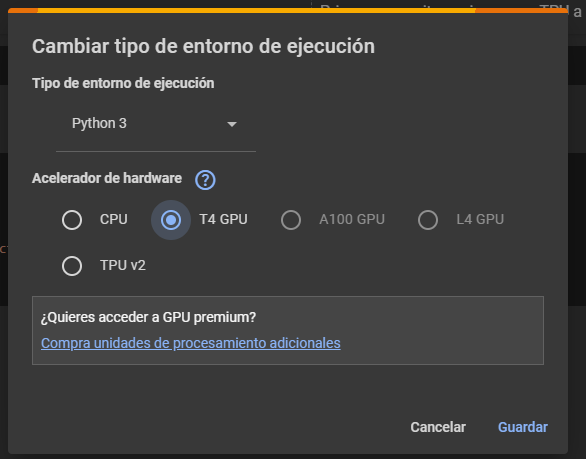

Comprueba los recursos que tienes

In [1]:
!nvidia-smi

Fri Aug 30 11:24:29 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 546.80                 Driver Version: 546.80       CUDA Version: 12.3     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                     TCC/WDDM  | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce RTX 3060 ...  WDDM  | 00000000:01:00.0  On |                  N/A |
| N/A   59C    P8              12W /  55W |    216MiB /  6144MiB |     29%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
import os
HOME = os.getcwd()
print(HOME)   # Imprime la direccion de la carpeta local de trabajo

d:\Personal\Noodle_detector


## Instalacion de Yolo v10

In [3]:
!pip install -q git+https://github.com/THU-MIG/yolov10.git

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [4]:
!pip install -q supervision

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.7/135.7 kB 9.3 MB/s eta 0:00:00


In [5]:
# ----- Descargas de Pesos
!mkdir -p {HOME}/weights
!wget -P {HOME}/weights -q https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10n.pt
!wget -P {HOME}/weights -q https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10s.pt
# !wget -P {HOME}/weights -q https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10m.pt
# !wget -P {HOME}/weights -q https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10b.pt
# !wget -P {HOME}/weights -q https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10x.pt
# !wget -P {HOME}/weights -q https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10l.pt
!ls -lh {HOME}/weights

total 43M
-rw-r--r-- 1 root root 11M May 26 15:54 yolov10n.pt
-rw-r--r-- 1 root root 32M May 26 15:54 yolov10s.pt


# Plataformas para creacion de Dataset


## Roboflow

### Configuracion y descarga

In [6]:
!pip install roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.8/79.8 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 5.9 MB/s eta 0:00:00


In [7]:
from roboflow import Roboflow
rf = Roboflow(api_key="uXf7AwgK8KFsjT1TLLgv")
project = rf.workspace("ronald-chicche-whacv").project("noodle_detector")
version = project.version(1)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.1.34, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to Noodle_detector-1 in yolov8:: 100%|██████████| 800/800 [00:00<00:00, 2692.81it/s]


NOTE: Verifica que las 4 ultimas lineas de data.yaml tengan esta estructura:

```
test: ../test/images
train: ../train/images
val: ../valid/images
```

### Entrenamiento

In [8]:
%cd {HOME}

!yolo task=detect mode=train epochs=40 batch=8 plots=True \
model={HOME}/weights/yolov10n.pt \
data={dataset.location}/data.yaml

/content
New https://pypi.org/project/ultralytics/8.2.81 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.1.34 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=/content/weights/yolov10n.pt, data=/content/Noodle_detector-1/data.yaml, epochs=40, time=None, patience=100, batch=8, imgsz=640, save=True, save_period=-1, val_period=1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, r

In [9]:
!ls {HOME}/runs/detect/train/

args.yaml					    R_curve.png		 val_batch0_labels.jpg
confusion_matrix_normalized.png			    results.csv		 val_batch0_pred.jpg
confusion_matrix.png				    results.png		 val_batch1_labels.jpg
events.out.tfevents.1724525597.10200db9ae72.4962.0  train_batch0.jpg	 val_batch1_pred.jpg
F1_curve.png					    train_batch1260.jpg  val_batch2_labels.jpg
labels_correlogram.jpg				    train_batch1261.jpg  val_batch2_pred.jpg
labels.jpg					    train_batch1262.jpg  weights
P_curve.png					    train_batch1.jpg
PR_curve.png					    train_batch2.jpg


### Inferencia

In [3]:
from ultralytics import YOLOv10
import supervision as sv
import os
import cv2


c:\Users\ronal\anaconda3\envs\vision\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
# Configuración de path
current_path = os.getcwd()
models = os.listdir(current_path + '/model')
# dictionary 2 leves de profundidad {'model': 'best', 'last'}
weights_path = {}
for model in models:
    weights_path[model] = {}
    for weight in os.listdir(os.path.join(current_path, 'model', model, 'weights')):
        w_key = weight.split('.')[0]
        weights_path[model][w_key] = os.path.join(current_path, 'model', model, 'weights', weight)


# print pretty dictionary
for model in weights_path:
    print(model)
    for weight in weights_path[model]:
        print(f'\t{weight}: {weights_path[model][weight]}')
# Cargar modelo escogiendo mediante uina variable definiedolo como una key del diccionario

item = 'epoch_100'
vertion = 'last'
device = 'cuda'

path = weights_path[item][vertion]
print(path)
if path and os.path.exists(path):
    print(f"Loading model from: {path}")
    model = YOLOv10(path)
    
    bounding_box_annotator = sv.BoundingBoxAnnotator()
    label_annotator = sv.LabelAnnotator()
else:
    print(f"File not found: {path}")


# D:\Personal\Noodle_detector\model\epoch_100\weights\best.pt
# d:\Personal\Noodle_detector\model\epoch_100\last.pt


epoch_100
	best: d:\Personal\Noodle_detector\model\epoch_100\weights\best.pt
	last: d:\Personal\Noodle_detector\model\epoch_100\weights\last.pt
epoch_40
	best: d:\Personal\Noodle_detector\model\epoch_40\weights\best.pt
	last: d:\Personal\Noodle_detector\model\epoch_40\weights\last.pt
epoch_50
	best: d:\Personal\Noodle_detector\model\epoch_50\weights\best.pt
	last: d:\Personal\Noodle_detector\model\epoch_50\weights\last.pt
epoch_70
	best: d:\Personal\Noodle_detector\model\epoch_70\weights\best.pt
	last: d:\Personal\Noodle_detector\model\epoch_70\weights\last.pt
d:\Personal\Noodle_detector\model\epoch_100\weights\last.pt
Loading model from: d:\Personal\Noodle_detector\model\epoch_100\weights\last.pt


SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


In [10]:
import random
# D:\Personal\Noodle_detector\model\epoch_100
class_colors = {
    'desordenado': (255, 0, 0),  # Rojo
    'ordenado': (0, 255, 0),  # Verde
}

random_image = random.choice(list(dataset.images.keys()))
random_image = dataset.images[random_image]

results = model(source=random_image, conf=0.25)[0]
detections = sv.Detections.from_ultralytics(results)
print(results)



NameError: name 'dataset' is not defined

In [20]:
# analysis de deections

AttributeError: 'Detections' object has no attribute 'color'

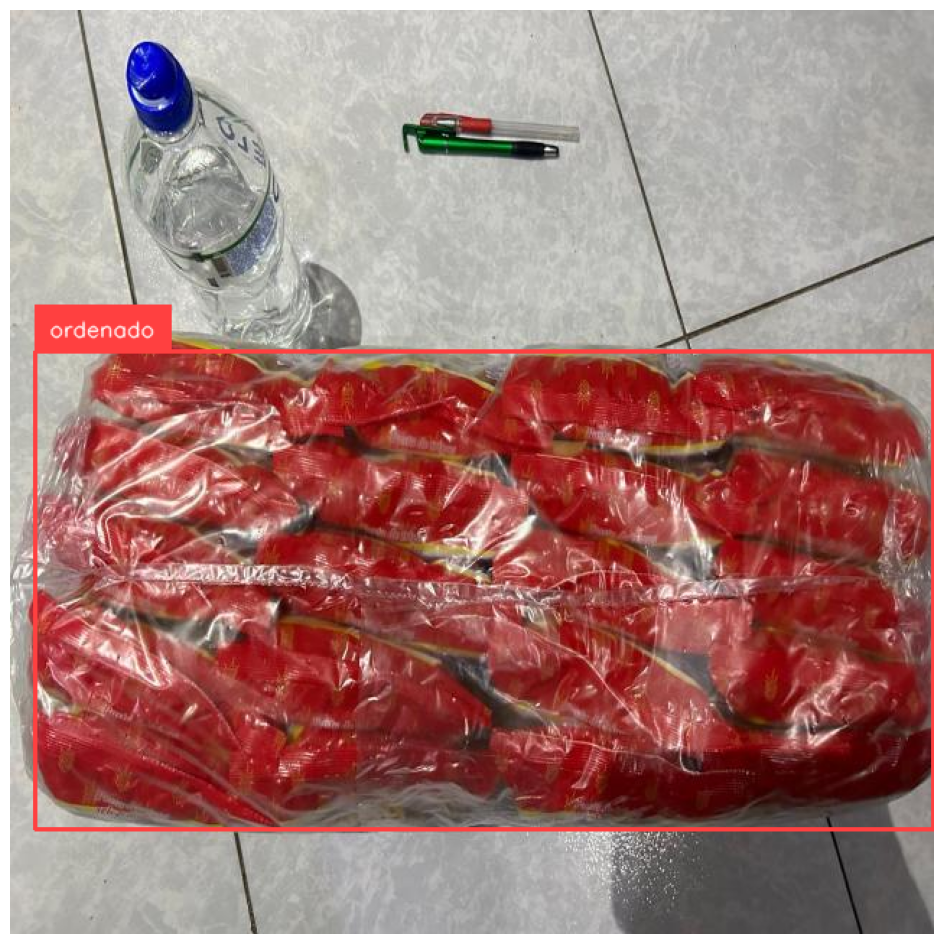

In [32]:

annotated_image = bounding_box_annotator.annotate(
    scene=random_image, detections=detections)
annotated_image = label_annotator.annotate(
    scene=annotated_image, detections=detections)

sv.plot_image(annotated_image)

In [59]:
# detecccion de prueba

#import cv2
#import os
#from google.colab.patches import cv2_imshow

images_path = [os.path.join(current_path, 'dataset', fichero) for fichero in os.listdir(os.path.join(current_path, 'dataset'))]

img_path = images_path[154]
image = cv2.imread(img_path)

# detect orientation of image and rotate if necessary
if image.shape[0] > image.shape[1]:
    image = cv2.rotate(image, cv2.ROTATE_90_CLOCKWISE)

# resize image
image = cv2.resize(image, (1280, 960))

# print dimensions ans esquema de colores
print(image.shape)

#cv2_imshow(image)
results = model(image)[0]
print('RESULTS : ', results)
detections = sv.Detections.from_ultralytics(results)
print('DETECTIONS : ', detections)
# bounding_box_annotator = sv.BoundingBoxAnnotator()
# label_annotator = sv.LabelAnnotator()

# annotated_image = bounding_box_annotator.annotate(
#     scene=image, detections=detections)
# annotated_image = label_annotator.annotate(
#     scene=annotated_image, detections=detections)

# sv.plot_image(annotated_image)


(960, 1280, 3)

0: 480x640 1 desordenado, 120.2ms
Speed: 6.5ms preprocess, 120.2ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)
RESULTS :  ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'desordenado', 1: 'ordenado'}
obb: None
orig_img: array([[[198, 183, 167],
        [197, 182, 166],
        [197, 182, 166],
        ...,
        [222, 207, 188],
        [222, 207, 188],
        [222, 207, 188]],

       [[197, 182, 166],
        [197, 182, 166],
        [196, 181, 165],
        ...,
        [222, 207, 188],
        [222, 207, 188],
        [222, 207, 188]],

       [[197, 182, 166],
        [197, 182, 166],
        [196, 181, 165],
        ...,
        [222, 207, 188],
        [222, 207, 188],
        [222, 207, 188]],

       ...,

       [[171, 172, 166],
        [175, 176, 170],
        [184, 186, 180],
        ...,
        [172, 166, 153],
        [172, 166, 153],

In [7]:
# type of variable results
print(type(detections))
# content of results
print(detections.xyxy)
print(detections.class_id)
print(detections.data)
print(detections.confidence)

<class 'supervision.detection.core.Detections'>
[[     151.23      4.3584      658.13      1235.3]]
[0]
{'class_name': array(['desordenado'], dtype='<U11')}
[    0.98181]


In [8]:
print(results.names)

{0: 'desordenado', 1: 'ordenado'}


3.1929932 222.76575 1275.4866 745.36475
desordenado


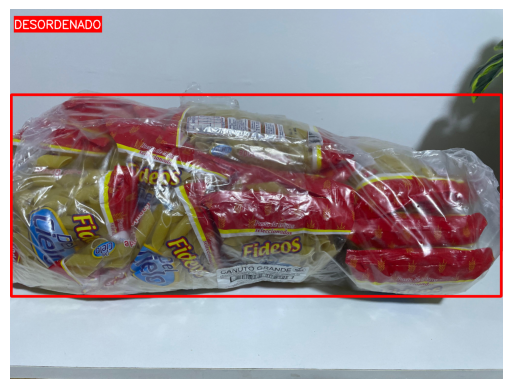

: 

In [60]:
# dibuja un rectangulo en la imagen con opencv
import cv2
import matplotlib.pyplot as plt
import numpy as np

class_colors = {
    'desordenado': (255, 0, 0),  # Rojo
    'ordenado': (0, 255, 0),  # Verde
}

# Dibuja un rectángulo en la imagen
def draw_rect(image, x1, y1, x2, y2, color=(255, 0, 0), thickness=5):
    cv2.rectangle(image, (int(x1), int(y1)), (int(x2), int(y2)), color, thickness)
    return image

# Dibuja un texto en la imagen
def draw_text(image, text, x, y, color=(255, 0, 0),  bg_color=(0, 0, 255), thickness=2):
    # poner en mayúsculas
    text = text.upper()
    # Obtener el tamaño del texto
    (text_width, text_height), baseline = cv2.getTextSize(text, cv2.FONT_HERSHEY_SIMPLEX, 1, thickness)
    
    # Coordenadas del rectángulo de fondo
    top_left = (int(x), int(y) - text_height - baseline)
    bottom_right = (int(x) + text_width, int(y) + baseline)
    
    # Dibujar el rectángulo de fondo
    cv2.rectangle(image, top_left, bottom_right, color, cv2.FILLED)
    
    cv2.putText(image, text, (int(x), int(y)), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), thickness)
    return image


image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_res = image_rgb.copy()

# Dibuja un rectangulo en la imagen
for i in range(len(detections.xyxy)):
    x1, y1, x2, y2 = detections.xyxy[i]
    print(x1, y1, x2, y2)
    print(results.names[detections.class_id[i]])
    image_res = draw_rect(image_res, x1, y1, x2, y2, color=class_colors[results.names[detections.class_id[i]]])
    image_res = draw_text(image_res, results.names[detections.class_id[i]], 10,  50, color=class_colors[results.names[detections.class_id[i]]])

# Muestra la imagen
# Asegúrate de que la imagen esté en formato RGB
image_rgb = image_res

# save image
cv2.imwrite('output.jpg', cv2.cvtColor(image_rgb, cv2.COLOR_RGB2BGR))

# Muestra la imagen usando matplotlib
plt.imshow(image_rgb)
plt.axis('off')  # Opcional: oculta los ejes
plt.show()

In [36]:
import supervision as sv

color_palette = sv.ColorPalette.from_hex(['#ff0000', '#00ff00', '#0000ff'])
color_palette.by_idx(0)

Color(r=255, g=0, b=0)

In [14]:
import cv2
# read and image and send it to through a post request /yolo_predict as 'image'
image_path = r'D:\Personal\Noodle_detector\dataset\IMG-20240821-WA0222.jpg'
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# send image to the server by post request
import requests
import json
import matplotlib.pyplot as plt

url = 'http://localhost:5000/yolo_predict'
files = {'image': open(image_path, 'rb')}
response = requests.post(url, files=files)
# read 'image' field from json response and show it
response_json = response.json()
print(response_json)
image = response_json['image']
#print sesults
#plt.imshow(image)
# (960, 1280, 3) <class 'numpy.ndarray'>


{'image': '/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAIBAQEBAQIBAQECAgICAgQDAgICAgUEBAMEBgUGBgYFBgYGBwkIBgcJBwYGCAsICQoKCgoKBggLDAsKDAkKCgr/2wBDAQICAgICAgUDAwUKBwYHCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgr/wAARCAPABQADASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwD7CRSF+8c4wfz+n+f5yxqHztBOeMc8VGEJ3DoAOMEnPGetTRQuJcIWPvjOK+sPDJNm3CEnPORingBs5IyByP8AP0NKmwjOO/BJ607luQce/HIoAdCAM469/pSlGPPTNImM7mAB7d6f70ACszLuJx24FSQcqc/pU

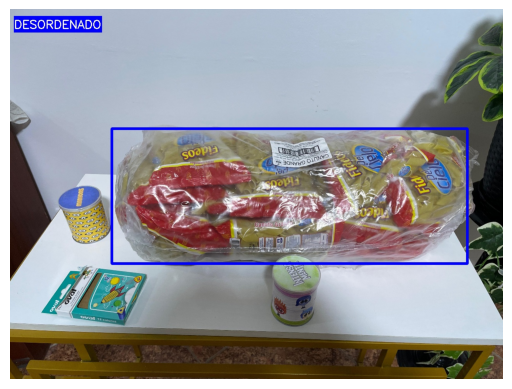

In [17]:
import base64
from io import BytesIO
from PIL import Image
import matplotlib.pyplot as plt


# Decodificar la cadena base64 a bytes
image_data = base64.b64decode(image)

# Convertir los bytes a una imagen usando PIL
image = Image.open(BytesIO(image_data))

# Mostrar la imagen usando matplotlib
plt.imshow(image)
plt.axis('off')  # Ocultar los ejes
plt.show()

In [18]:
#Detections(xyxy=array([[     264.92,      310.15,        1187,      660.17]], dtype=float32), mask=None, confidence=array([    0.98018], dtype=float32), class_id=array([0]), tracker_id=None, data={'class_name': array(['desordenado'], dtype='<U11')})
# extrae su informacion en un diccionario
detections_dict = detections.to_dict()
print(detections_dict)

NameError: name 'detections' is not defined